# Question 2

In [45]:
library(MASS)
library(cluster)
library(tidyverse)
library(factoextra)

[10 marks] There are 200 observations for ten variables $x_1,...,x_{10}$ in "DataSetCluster2.csv". Carry out a cluster analysis on the data using various clustering methods. Write a detailed solution to determine the optimal number of clusters and present the clusters.

In [46]:
Data <- read.csv("/Users/alexwiigs/Documents/Code/STAT 553 Final/DataSetCluster2.csv")
head(Data)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02418215,0.9057409,-0.89654534,16.60887,4.221415,1.16637741,-0.2052993,0.01120131,-1.7152422,-2.3023032
2,-0.91211544,-0.3183207,-0.28336752,15.81970,5.435420,-0.33993145,0.6511933,0.17201647,-1.7526890,0.5470796
3,0.79961208,-1.6158001,2.50659921,17.19424,7.024773,0.30624701,0.2737665,0.72749315,-1.9385387,-1.4282325
4,-1.59243040,-0.9025596,0.40588912,16.01002,4.303091,0.63783095,1.0246732,0.06644881,-2.0525133,-2.0600324
5,-0.94986401,-1.6754776,0.01565019,15.38525,6.349174,3.60761465,0.8176594,0.39043982,-1.4371595,-1.2893822
6,1.72964187,-0.9861516,2.73677906,17.10873,7.712926,0.07800361,-0.2097932,0.42659921,-0.6688208,-1.2414902


There are many ways to determine an optimal number of unknown clusters that are defined by similarities they share to other observations. Typically, we will determine these similarities by a measure of distance between the vectors. A common measure of distance between a pair of observations is the Euclidean distance, defined as
$$d(\textbf{x}, \textbf{y}) = \sqrt{ (\textbf{x} - \textbf{y})'(\textbf{x} - \textbf{y}) }$$
We could also use more complicated measures of distance like the Minkowski metric
$$d(\textbf{x}, \textbf{y}) = (\sum_{j=1}^p | x_j - y_j|^r)^{1/r}$$
The output will differ depending on what you select $r$ to be. For example, if you set $r=2$, you will get the euclidean "as the crow flies" distance above. If you select $r=1$" you will get the "city block" distance.

For the $n = 200$ entries in this sample we can use one of the distance metrics above to define a symmetric $n \times n$ distance matrix $D$, whose diagonal entries will be $0$ (because each entry will have zero distance from itself) and off-diagonal entries will represent the distance between vector $i$ and $j$.

$$ \begin{pmatrix} 0 & d_{12} & d_{13} & \dots \\ d_{21} & 0 & d_{23} & \dots \\ d_{31} & d_{32} & 0 & \dots \\ \vdots & \vdots & \vdots & \ddots  \end{pmatrix} $$

We can graph these distances in R using a heat map. The darker the values the greater the distance between entries.

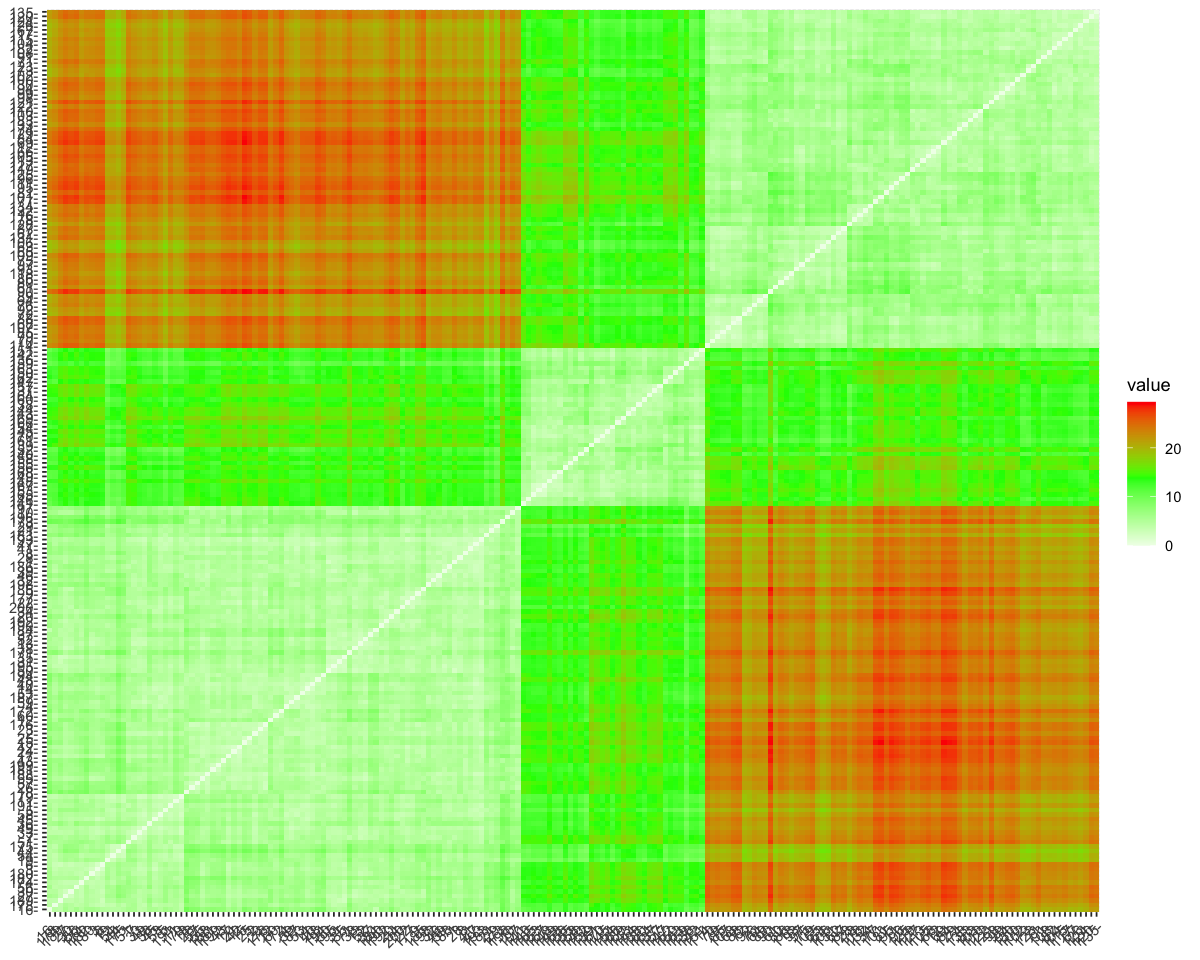

In [67]:
distance_map <- get_dist(Data)
fviz_dist(distance_map, gradient = list(low = "white", mid = "green", high = "red"))

An inital glance at the distance matrix seems to suggest three clusters, where two are close together and one is farther apart from the rest. Further analysis might be able to confirm this intuition.

## Hierarchical Clustering Methods

Hierarchical Clustering Methods involve utilizing algorithims which look at the distance between the entries and systemically joins the close entries into single points (clusters). By the end of the algorthim you will hopefully have values sorted into clusters (represented by a dendrogram), which will aid in the decision of deciding the optimal amount of clusters to define for the data set. Three typical Heirarchical Clustering Methods are explained below.

**Complete Linkage (Farthest Neighbor)**  
In the complete linkage approach the distance between two clusters is defined by the maximum distance between entries in the pair of clusters. For clusters $A$ and $B$ would would have:
$$ D(A,B) = \max   \{ d( \textbf{y}_i \textbf{y}_j ) \text{ for } \textbf{y}_i \in  A \space \& \space \textbf{y}_j \in  B \} $$
In the first step the algorithm will merge the two entries with the smallest calculated distance in the matrix $D$ above, calculate a new $D$ matrix with one less entry (because the two have been joined), where the distance between it and every other entry is the distance between the entry and whatever point inside the cluster that is farthest away from it. This algrothim will continue until every entry has been sorted.


**Sinlge Linkage (Nearest Neighbor)**  
The method is indentical to the Complete Linkage method defined above, except the distance between two clusters is defined as the distance between the nearest entries in the pair of clusters.
$$ D(A,B) = \min   \{ d( \textbf{y}_i \textbf{y}_j ) \text{ for } \textbf{y}_i \in  A \space \& \space \textbf{y}_j \in  B \} $$


**Average Linkage**  
This method is similar to the two methods above, except that the distance between two clusters is defined by the distance beween two new vectors created by taking the average of the entries in each cluster.
$$D(A,B) = \frac{1}{n_A n_B}\sum_{i=1}^{n_A} \sum_{j=1}^{n_B} d( \textbf{y}_i \textbf{y}_j) $$
where $n_A,n_B$ is the number of points in $A$ and $B$ respectively. 

The following functions test all three algorithms and graph the resulting dendrograms.

In [47]:
cluster <- function(distance_method, cluster_method) {
    Data |> dist(method = distance_method) |> hclust(method = cluster_method)}
graph <- function(cluster) { cluster |> plot(cex =0.5, sub = "", hang = -0.1, xlab = "") }
cluster_method <- c("complete", "single", "average")


Using the euclidean distance as a measure of the distance between entries we get the following plots:

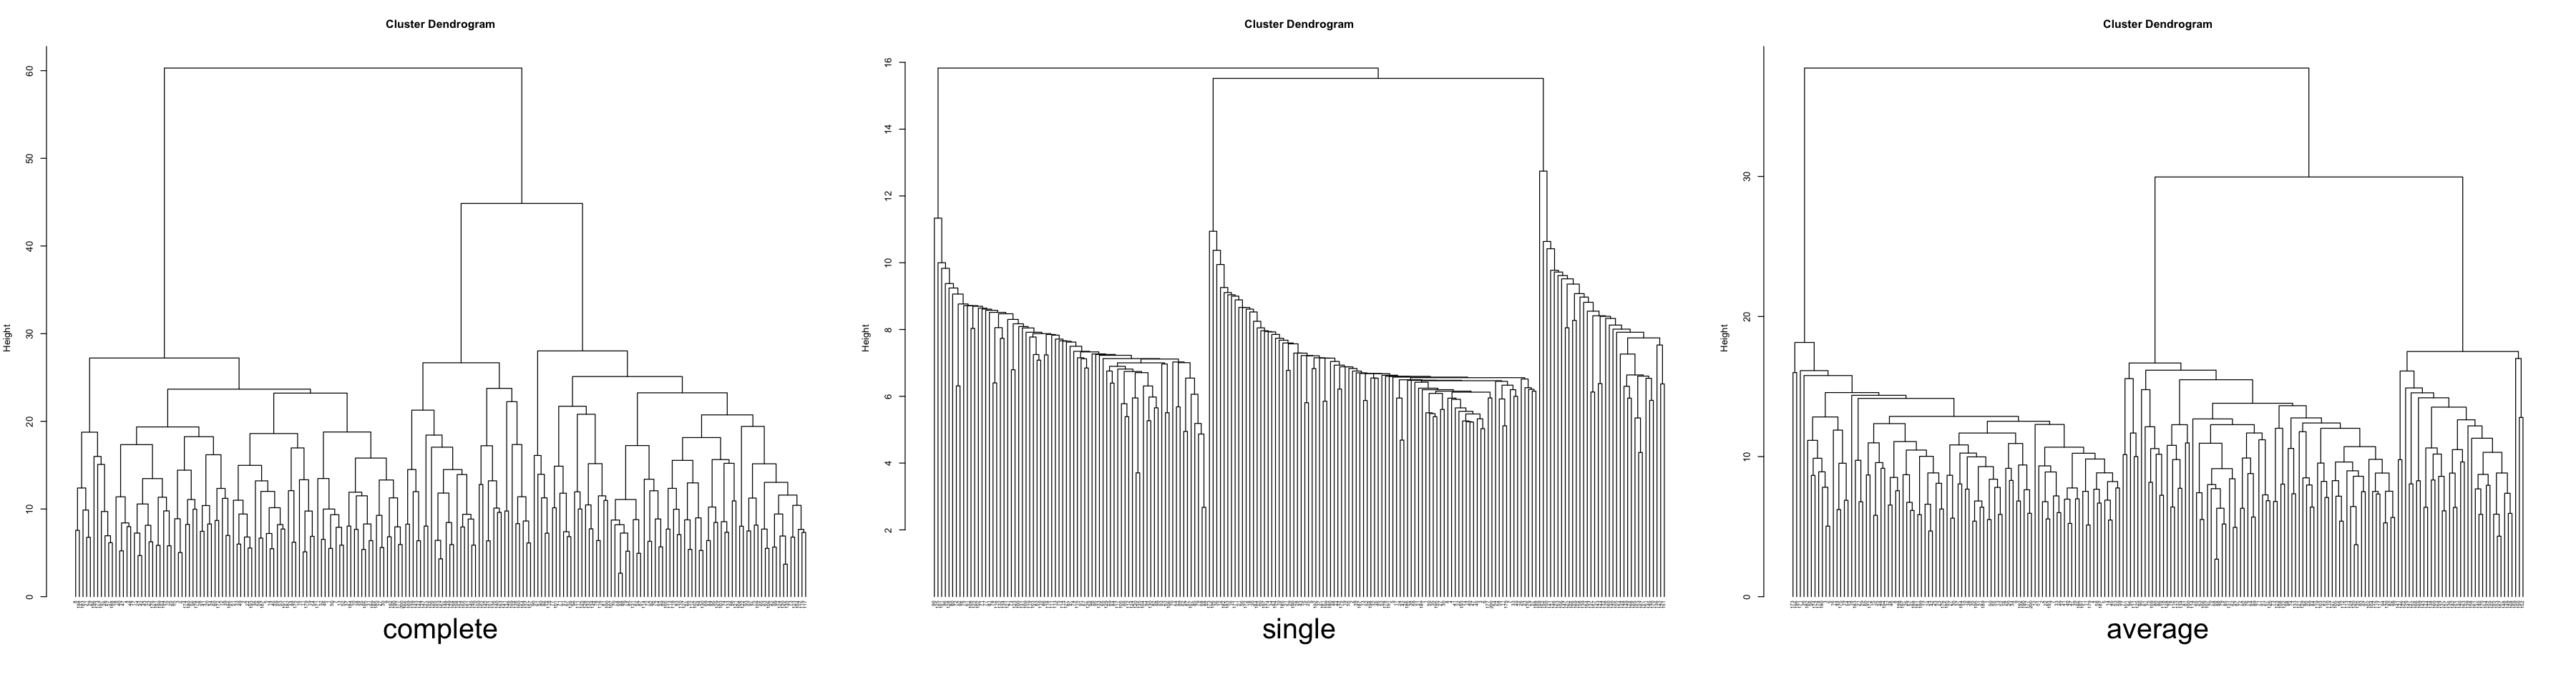

In [48]:
par(mfrow = c(1, 3))
options(repr.plot.width = 30, repr.plot.height = 8)
for (i in 1:length(cluster_method)) { 
    graph( cluster(distance, cluster_method[i] ))
    title(sub = cluster_method[i], line = 0, cex.sub = 3,)}


The height represents the minimum, maximum and average distance between clusters respectively. Unsurprisingly, distance between the clusters is greater for complete linkage, smaller for single, and somewhere in between for the average. In every case we see that three clusters form with fairly significant distances beween them.  

Repeating the procedure but using manhattan (city block distance) we see different plots that again seem to create three clusters.

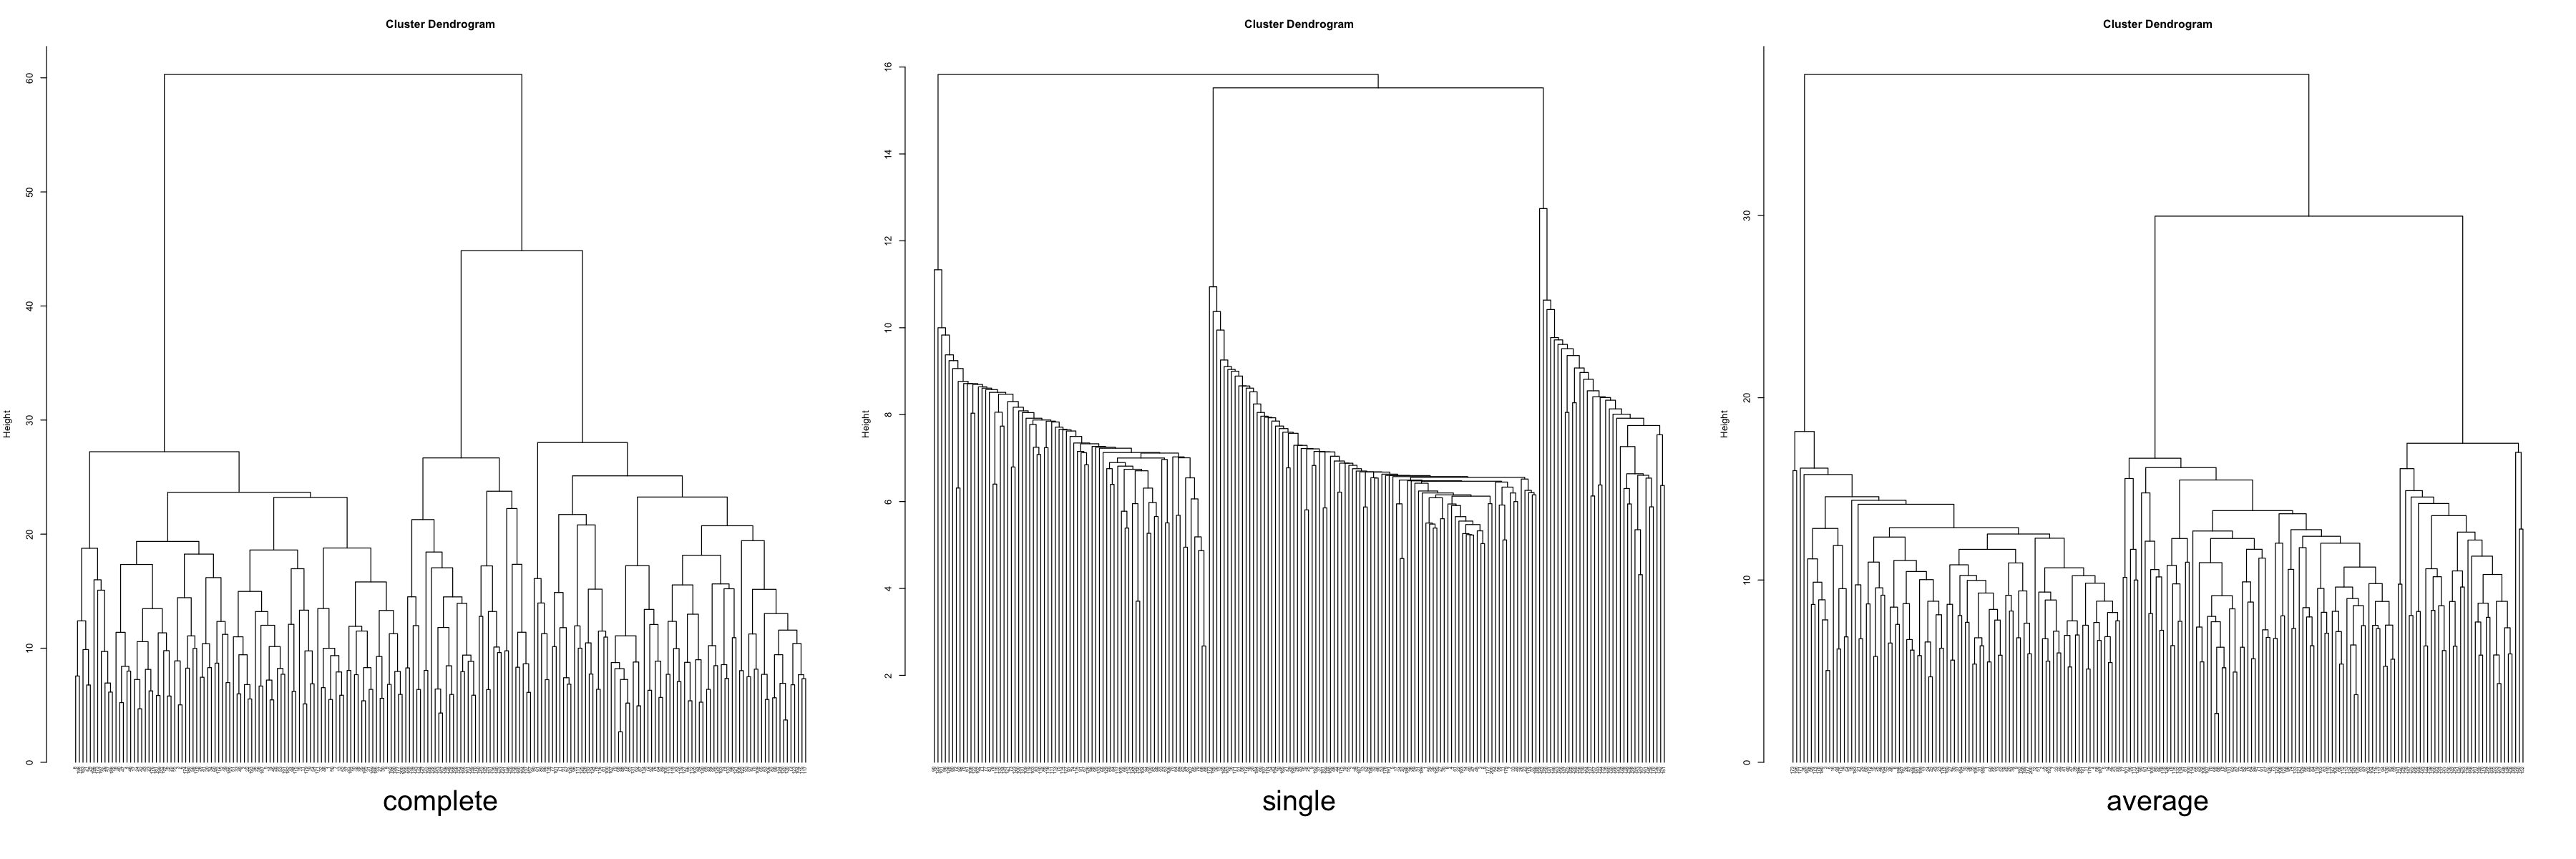

In [49]:
distance <- "manhattan"
par(mfrow = c(1, 3))
options(repr.plot.width = 30, repr.plot.height = 10)
for (i in 1:length(cluster_method)) { 
    graph( cluster(distance, cluster_method[i] ) )
    title(sub = cluster_method[i], line = 0, cex.sub = 3)}

We choose the number of clusters by deciding at what distance we should "cut" the graph, seperating the data into the final clusters. If we cut the graph for average linkage using eulcidean distance at Height = 13, we create three distinct clusters, which I believe represent the optimal number of clusters using the Hierarchical approach.

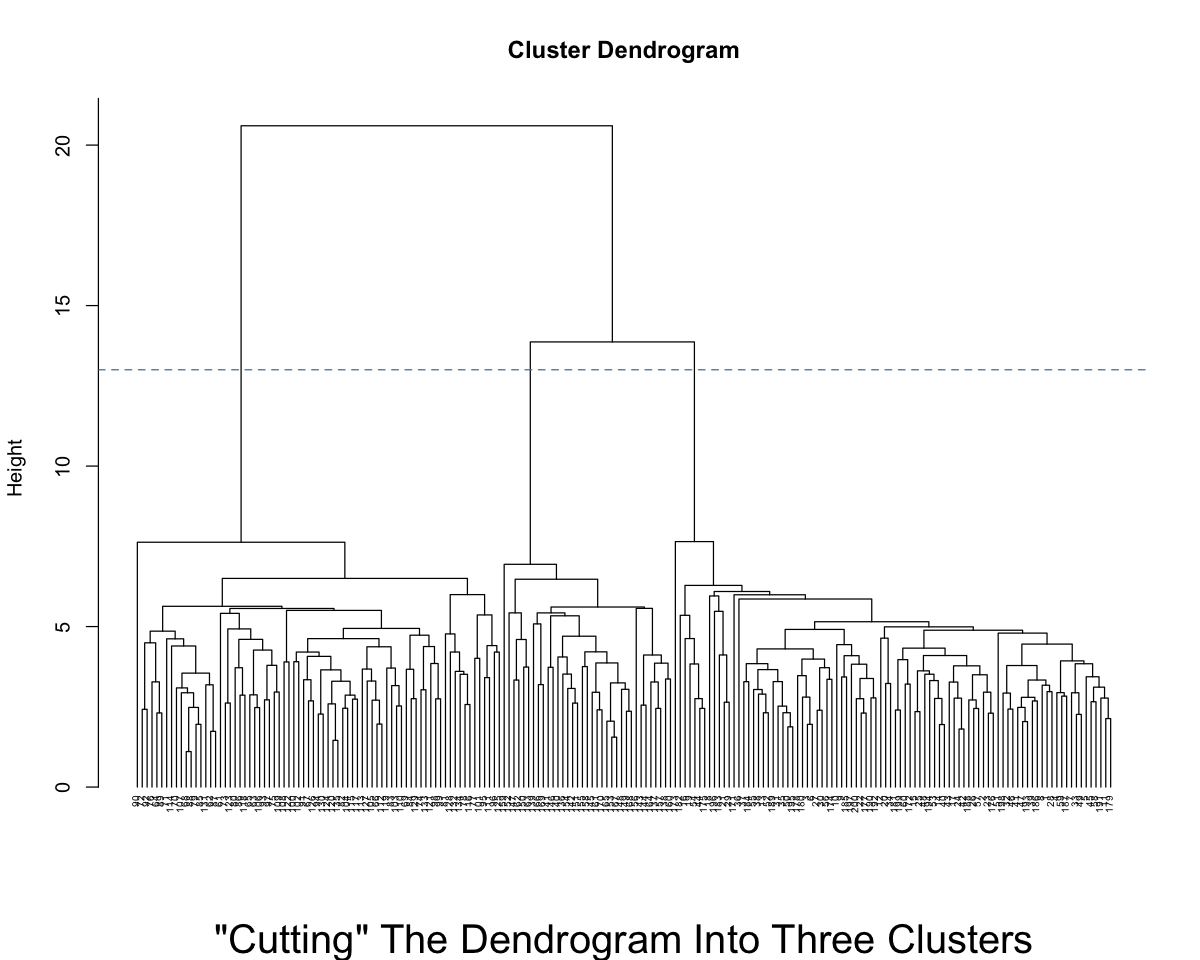

In [50]:
options(repr.plot.width = 10, repr.plot.height = 8)
hierarchical_cluster <- Data |> dist(method = "euclidean") |> hclust(method = "average")
graph(hierarchical_cluster)
 abline(h = 13, col = "steelblue", lty = 2)
 title(sub = "\"Cutting\" The Dendrogram Into Three Clusters", cex.sub = 2)

In [57]:
fit <- cutree(hierarchical_cluster, k = 3)
table(fit)

fit
 1  2  3 
90 75 35 

We have taken the data set and found three clusters to split the entries into. The first cluster has 90 values, the second has 75, and the third has 35 values.

## Nonhierarchical Clustering Methods

There are also techniques for defining clusters that don't rely on hieararchical methods. Many of these methods rely on partitioning the data, like the next method we will try.

**k-Means Clustering Method**  
This method starts by selecting a certain amount, $k$ items to serve as "seeds" that will later be replaced by the centroids of clusters. Depending on the initial seeds chosen the final clusters can vary wildly. After the inital seeds have been set each entry will be assigned to the nearest cluster (initial seeds will be replaced by cluster centroid once there are two entries within them). After all the entries are assigned to the $k$ clusters each entry is re-examined and switched to whatever cluster centroid is closest. This repeats over and over until no improvements can be made. Two huge difference from the methods discussed above is that in this method entries can be moved from one cluster to another. Another big difference is that we must choose the number of clusters beforehand.

One way to utilize k-means clustering is as an improvement over the k-cluster solution from the average linkage clustering method.  

We can calculate the three initial seeds from the hierarchical cluster fit we made above like so: 

In [62]:
# Create starting centroids from average linkage mode
partition_Data <- cbind(Data, as.data.frame(fit))
centroids <- matrix(nrow = 3, ncol = 10)
for(i in 1:3){ centroids[i,] <- partition_Data |>  filter(fit == i) |> select(-fit) |> colMeans()}
row.names(centroids) <- c("centroid1", "centroid2", "centroid3")
centroids

centroid1,0.02435395,0.01646991,0.0243076,16.126644,6.015935,1.026884,-0.06607814,0.07142495,-0.9199677,-1.0319261
centroid2,-0.07120288,0.12499849,-0.1019839,6.006199,5.994052,21.170301,0.02671874,0.01875257,-0.8935091,-1.0219029
centroid3,0.07925527,-0.09812794,0.1309183,9.370199,12.075636,10.146259,-0.14747458,-0.11011297,-0.8317515,-0.8049518


Using these initial centroids we cunduct a possible improvement on the average linkage method using k-means clustering:

In [73]:
improvement_cluster <- kmeans(Data, centers = centroids)
improvement_cluster
table(improvement_cluster$cluster)

K-means clustering with 3 clusters of sizes 90, 75, 35

Cluster means:
           x1          x2         x3        x4        x5        x6          x7
1  0.02435395  0.01646991  0.0243076 16.126644  6.015935  1.026884 -0.06607814
2 -0.07120288  0.12499849 -0.1019839  6.006199  5.994052 21.170301  0.02671874
3  0.07925527 -0.09812794  0.1309183  9.370199 12.075636 10.146259 -0.14747458
           x8         x9        x10
1  0.07142495 -0.9199677 -1.0319261
2  0.01875257 -0.8935091 -1.0219029
3 -0.11011297 -0.8317515 -0.8049518

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within clust


 1  2  3 
90 75 35 

No improvement seems to have been made. We can view these clusters by graphing them against the their first two principle compenents, like so:

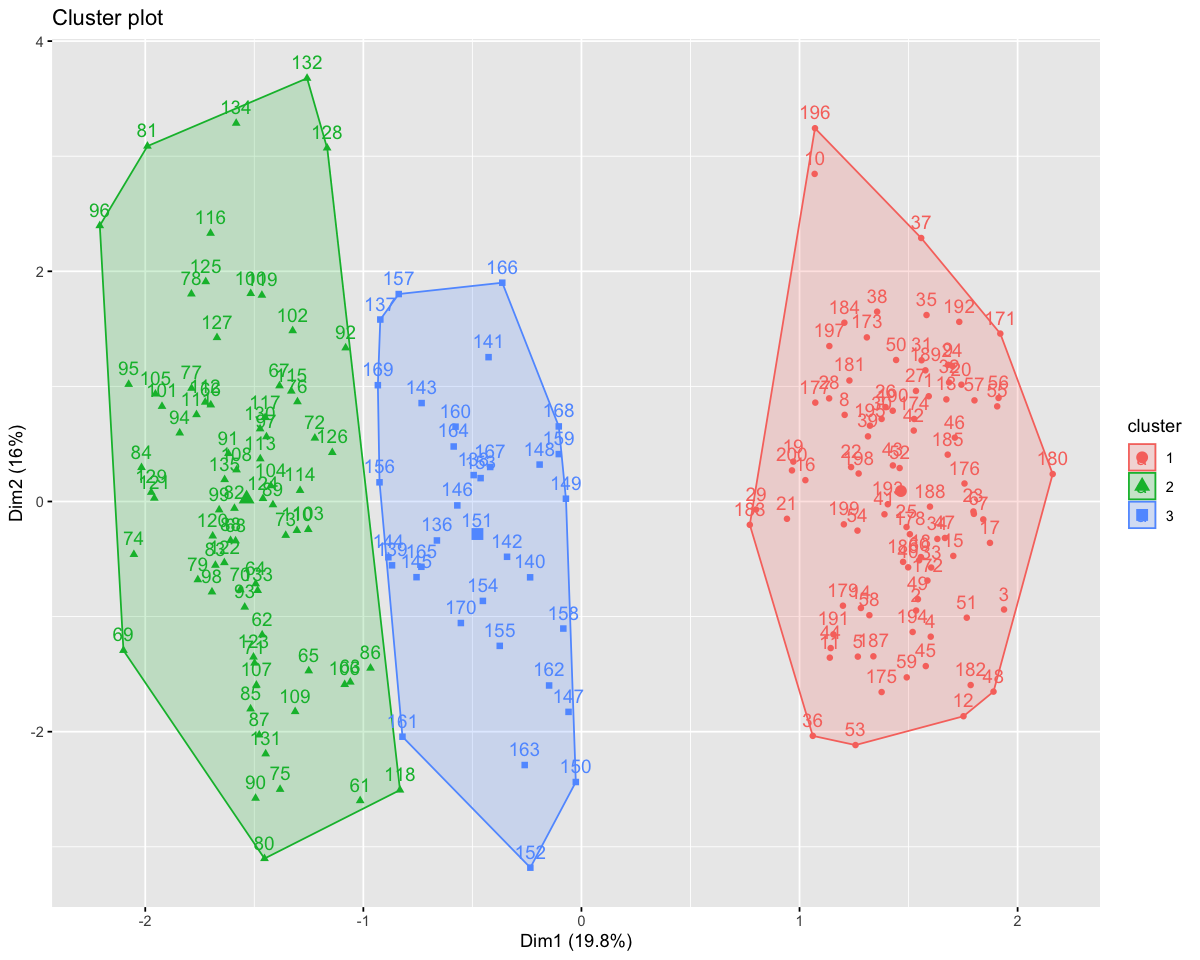

In [75]:
fviz_cluster(improvement_cluster, data = Data)

Thus, we have used various clustering methods to partition the data set into three optimal clusters.